## Import Modules 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Change The Indicators here..

In [2]:
name_of_dataset = 'PSDN-short.csv'
column_dataset_obs = 'Close'
p = 2
d = 1
q = 2

## read Dataset

/var/folders/lv/j9w__j_11b1cntk8h5tlnkvr0000gn/T/ipykernel_34938/3221032784.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


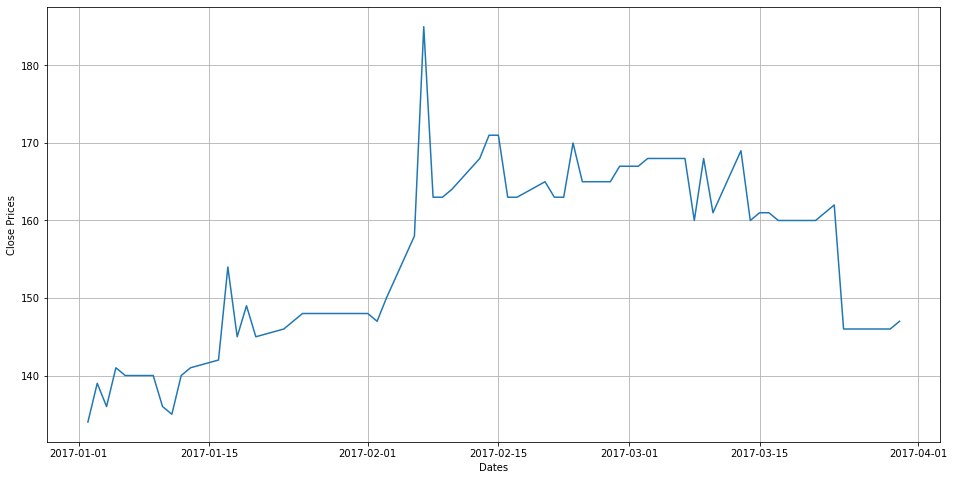

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('../Datasets/'+name_of_dataset, sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
#data = data.loc['2012-11-10':'2017-11-10']
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs]);

## Check and Remove Null Data

In [4]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,134.0,134.0,134.0,134.0,134.0,0
2017-01-03,135.0,139.0,135.0,139.0,139.0,4500
2017-01-04,139.0,139.0,136.0,136.0,136.0,40500
2017-01-05,135.0,141.0,135.0,141.0,141.0,6900
2017-01-06,136.0,140.0,136.0,140.0,140.0,200
...,...,...,...,...,...,...
2017-03-23,170.0,170.0,162.0,162.0,162.0,10800
2017-03-24,170.0,181.0,144.0,146.0,146.0,13006800
2017-03-27,146.0,151.0,146.0,146.0,146.0,190900


## Plotting Data

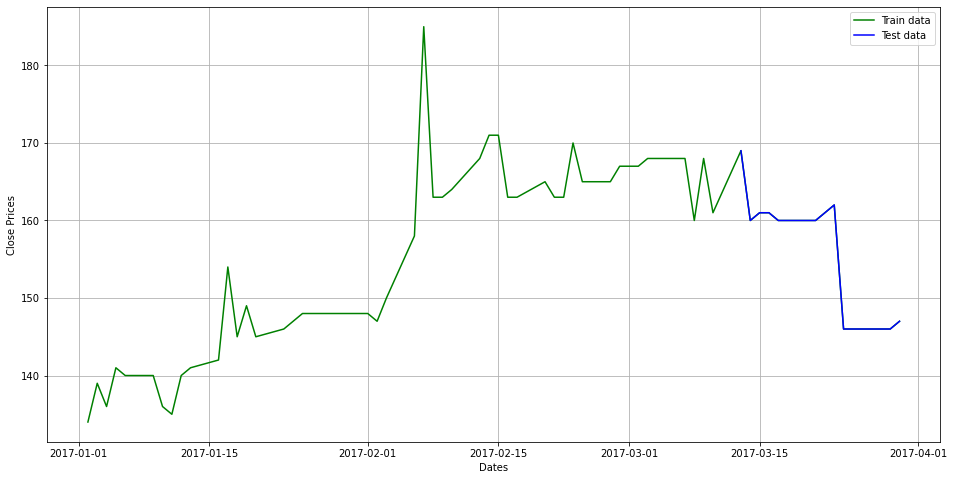

In [7]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs], 'green', label='Train data')
plt.plot(test_data[column_dataset_obs], 'blue', label='Test data')
plt.legend()

In [8]:
print("Jumlah Train Data: " + str(len(train_data)))
print("Jumlah Test Data: " + str(len(test_data)))

Jumlah Train Data: 50
Jumlah Test Data: 13


## ARIMA Model

In [9]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 8
# data_arima = data['Open']
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
# plt.figure(figsize=(16,8))
# fig = result.plot()
# plt.show()

In [10]:
train_arima = train_data[column_dataset_obs]
test_arima = test_data[column_dataset_obs]

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### Report Performance of ARIMA Predictions

In [11]:
# mse = mean_squared_error(y, predictions)
# print('MSE: '+str(mse))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+ str("{:.2f}".format(rmse)))
mae = mean_absolute_error(y, predictions)
print('MAE: '+ str("{:.2f}".format(mae)))
mape = math.sqrt(mean_absolute_percentage_error(y, predictions))
print('MAPE: '+ str("{:.2f}".format(mape*100)) + '%')

RMSE: 6.32
MAE: 4.52
MAPE: 17.18%


### Plotting Prediction of ARIMA

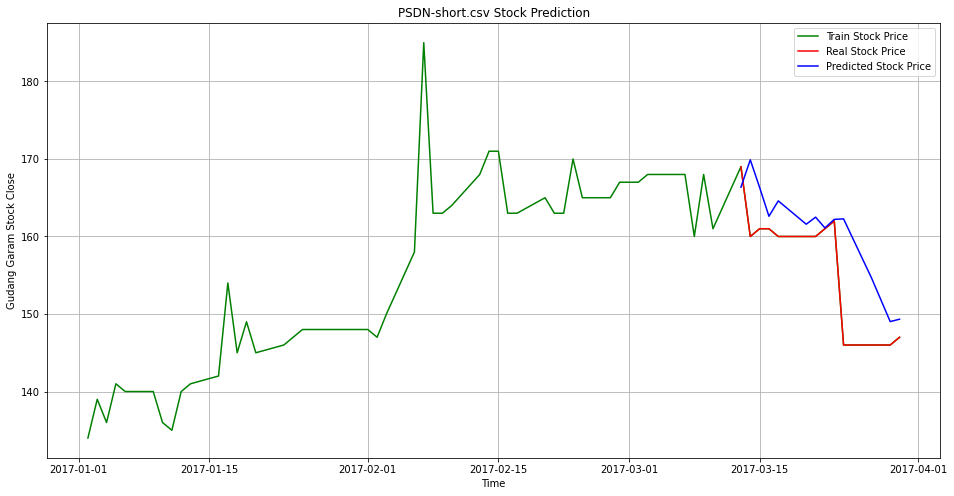

In [12]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data[column_dataset_obs].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(name_of_dataset +' Stock Prediction')
plt.xlabel('Time')
plt.ylabel(name_of_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

In [13]:
# y

## Save as new Dataset